# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lon = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# url="https://openweathermap.org/api"
API_key=weather_api_key
units= "imperial"
query_url=f'http://api.openweathermap.org/data/2.5/weather?appid={API_key}&units={units}&q='


In [10]:
#Loop through the list of cities and perform data request
city_id_list=[]
cities_list=[]
country_list=[]
lat_list=[]
lon_list=[]
cloudiness_list=[]
humidity_list=[]
maxtemp_list=[]
windspeed_list=[]
date_list=[]

for city in cities:
    len(cities_list)
    response=requests.get(query_url + city).json() 
    print(response)
    print(json.dumps(response, indent=4))
    try:
     
        city_id_list.append(response['id'])
        cities_list.append(response['name'])
        lat_list.append(response['coord']['lat'])
        lon_list.append(response['coord']['lon'])
        country_list.append(response['sys']['country'])
        cloudiness_list.append(response['clouds']['all'])
        humidity_list.append(response['main']['humidity'])
        maxtemp_list.append(response['main']['temp_max'])
        windspeed_list.append(response['wind']['speed'])
        date_list.append(response['dt'])
    except KeyError:
        print("City not found")


        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 85.82,
        "feels_like": 92.21,
        "temp_min": 85.82,
        "temp_max": 85.82,
        "pressure": 1012,
        "humidity": 64,
        "sea_level": 1012,
        "grnd_level": 1009
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.11,
        "deg": 206,
        "gust": 8.81
    },
    "clouds": {
        "all": 76
    },
    "dt": 1619406726,
    "sys": {
        "country": "ID",
        "sunrise": 1619387042,
        "sunset": 1619430542
    },
    "timezone": 28800,
    "id": 1637001,
    "name": "Luwuk",
    "cod": 200
}
{'coord': {'lon': -101.2541, 'lat': 53.8251}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.4, 'feels_like': 32.85, 'temp_min': 37.4, 'temp_max': 37.4, 

In [11]:
#Create a dataframe from cities, latitude and longitudes
cities_dict = {
    "city id": city_id_list,
    "city": cities_list,
    "country": country_list,
    "lat": lat_list,
    "lon": lon_list,
    "cloudiness %": cloudiness_list,
    "humidity %": humidity_list,
    "max temp (F)": maxtemp_list,
    "wind speed (mph)": windspeed_list,
    "date": date_list}
cities_data=pd.DataFrame(cities_dict)
cities_data

,city id,city,country,lat,lon,cloudiness %,humidity %,max temp (F),wind speed (mph),date
0,5905393,Bonavista,CA,48.6499,-53.1147,12,70,41.00,8.05,1619406522
1,3424607,Tasiilaq,GL,65.6145,-37.6368,90,70,37.40,14.97,1619406228
2,5106841,Albany,US,42.6001,-73.9662,38,50,46.00,1.01,1619406382
3,3883457,Lebu,CL,-37.6167,-73.6500,28,92,54.41,9.37,1619406523
4,2524371,Locri,IT,38.2414,16.2623,16,66,57.99,8.05,1619406523
...,...,...,...,...,...,...,...,...,...,...
541,3038333,Arrondissement d'Ajaccio,FR,42.0000,8.9167,0,76,50.00,4.61,1619406730
542,2035836,Manzhouli,CN,49.6000,117.4333,67,33,63.46,20.87,1619406730
543,3901903,Uyuni,BO,-20.4597,-66.8250,0,25,38.73,10.20,1619406730
544,5368361,Los Angeles,US,34.0522,-118.2437,1,59,60.80,9.98,1619405977


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#Export Dataframe to CSV
df=pd.DataFrame(cities_data)
df.to_csv(r'/Users/kellenquinn/Desktop/Python-api-challenge/Resources/citieskq.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#No cities with humidity in excess of 100%

In [14]:
#  Get the indices of cities that have humidity over 100%.
#  Not Applicable

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

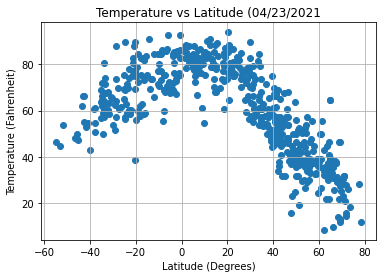

In [16]:
#Latitude vs. Temperature Plot
plt.scatter(cities_data["lat"], cities_data["max temp (F)"], marker="o")

#Labels
plt.title("Temperature vs Latitude (04/23/2021")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsTemperature.png")

#Show Plot
plt.show()

#Observations
#This chart is analyzying daily max temperature in relation to distance from the equator. As expected from well-established anecdotal knowledge, the further one gets from the equater; the cooler the temperature. 

## Latitude vs. Humidity Plot

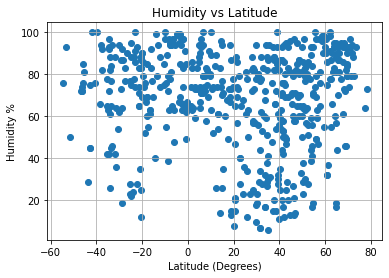

In [17]:
#Latitude vs. Humidity Plot
plt.scatter(cities_data["lat"], cities_data["humidity %"], marker="o")

#Labels
plt.title("Humidity vs Latitude")
plt.ylabel("Humidity %")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)

# Save the figure
plt.savefig("Latitudevshumidity.png")

#Show Plot
plt.show()

#Observations
#This chart is analyzing humidity % in relation to distance from the equator. Unlike the temperature chart, there appears to be little relation to humidity and distance from the equator. Keeping in mind that the higher the humidity, the more liquid in the air; the places with higher humidity % are more than likely to receive more rain/snow. 

## Latitude vs. Cloudiness Plot

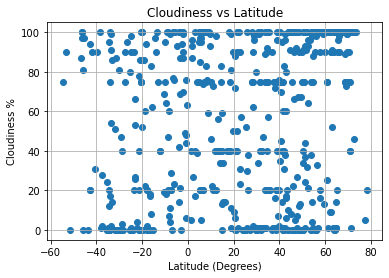

In [18]:
#Latitude vs. Cloudiness Plot
plt.scatter(cities_data["lat"], cities_data["cloudiness %"], marker="o")

#Labels
plt.title("Cloudiness vs Latitude")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)

# Save the figure
plt.savefig("Latitudevscloudiness.png")

#Show Plot
plt.show()

#Observations
#This chart is analyzing the relationship between distance from the equator. There appears to be little to no relation between the two; but in concert with the humidity vs. latitude chart this could be useful to guess likelihood of rainfall. 

## Latitude vs. Wind Speed Plot

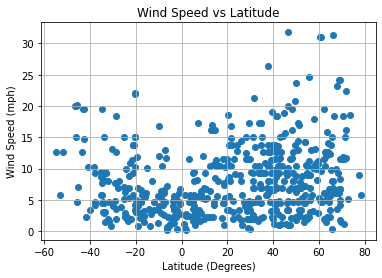

In [19]:
#Latitude vs. Wind Speed Plot
plt.scatter(cities_data["lat"], cities_data["wind speed (mph)"], marker="o")

#Labels
plt.title("Wind Speed vs Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)

# Save the figure
plt.savefig("Latitudevswindspeed.png")

#Show Plot
plt.show()

#Observations
#This chart is analyzing average wind speed (mph) in relation to distance from the equator. From this chart is appears that average windspeed is likely going to be between 0 mph and 25 mph on a given day. Keeping in mind that there are several high altitude slip streams that go specific ways that aviation uses...the distribution here isn't surprisning and you can see that the some of the windspeeds between 40 degrees and 65 to 70 degrees are quite excessive compared to the rest of the chart. 

## Linear Regression

In [20]:
# Defining Northern and Southern Hemispheres 
northern_hemi=cities_data.loc[cities_data['lat'] >=0]
southern_hemi=cities_data.loc[cities_data['lat'] <0]

# Print Statements to verify that hemisphere definition functioning
# print(northern_hemi)
# print(southern_hemi)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7876724561329927


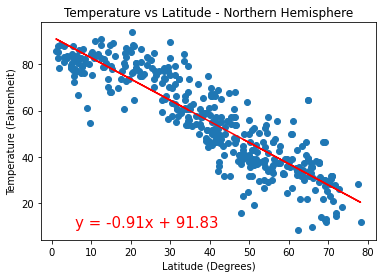

In [21]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

# Convert to floats and store lat(northern) and max temp(f) as x and y values
x_values = northern_hemi["lat"].astype('float')
y_values = northern_hemi["max temp (F)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15,color="red")

# Label plot
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Temperature (Fahrenheit)")
plt.title("Temperature vs Latitude - Northern Hemisphere")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

#Observation
#This chart shows that there is negative correlation in regards to distance from the equator in the Northern Hemisphere in that the temperatures drop dramatically the further away from the equator. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.44127852190675637


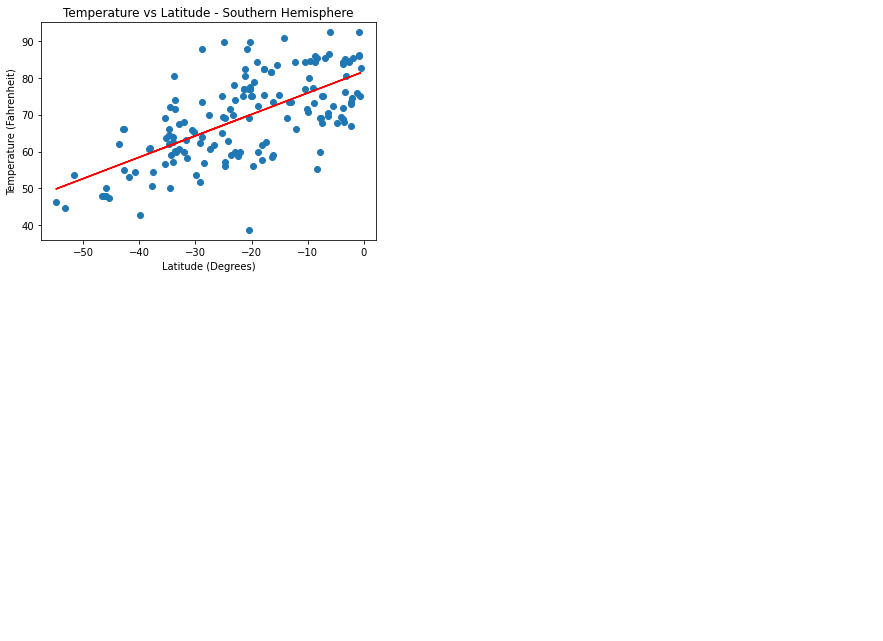

In [22]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# Convert to floats and store lat(southern) and max temp(f) as x and y values
x_values = southern_hemi["lat"].astype('float')
y_values = southern_hemi["max temp (F)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,-70), fontsize=13,color="red")

# Label plot
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Temperature (Fahrenheit)")
plt.title("Temperature vs Latitude - Southern Hemisphere")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

#Observations 
#As with the chart above, this chart of the Southern Hemisphere also confirms that the further South you go from the equator; the cooler the temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.015074856531353105


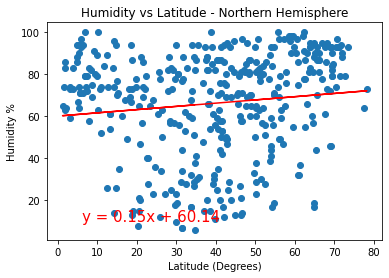

In [23]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Convert to floats and store lat(northern) and humidity (%) as x and y values
x_values = northern_hemi["lat"].astype('float')
y_values = northern_hemi["humidity %"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15,color="red")

# Label plot
plt.title("Humidity vs Latitude - Northern Hemisphere")
plt.ylabel("Humidity %")
plt.xlabel("Latitude (Degrees)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

#Observation
#This chart shows that there is a slight positive correlation to humidity and distance from the equator in the northern hemisphere, which makes sense in since we know the further north we go; the cooler it gets. Humidity being a measurement of liquid in the air, way north there will be snow.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.026511142434751625


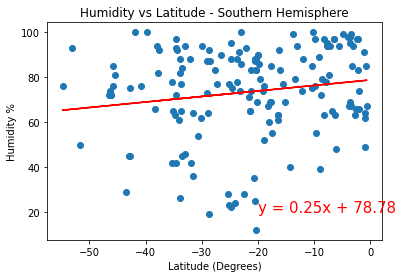

In [24]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Convert to floats and store lat(southern) and humidity (%) as x and y values
x_values = southern_hemi["lat"].astype('float')
y_values = southern_hemi["humidity %"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20), fontsize=15,color="red")

# Label plot
plt.title("Humidity vs Latitude - Southern Hemisphere")
plt.ylabel("Humidity %")
plt.xlabel("Latitude (Degrees)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

#Observation
#As with the northern hemisphere chart, the southern hemisphere chart also has a slight positive correlation between humidity and distance from the equator. In this case, the further south you go, the more humid it gets. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.009218256306312723


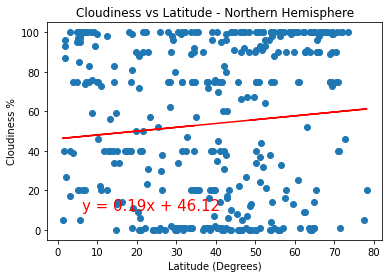

In [25]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Convert to floats and store lat(northern) and cloudiness (%) as x and y values
x_values = northern_hemi["lat"].astype('float')
y_values = northern_hemi["cloudiness %"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15,color="red")

# Label plot
plt.title("Cloudiness vs Latitude - Northern Hemisphere")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude (Degrees)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

#Observation
#This chart measures cloudiness in relation to distance from the equator in the northern hemisphere. Although there is a slight correlation, the chart makes it appear that there is little to no relevance between cloudiness and distance from the equator. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.012200107135344635


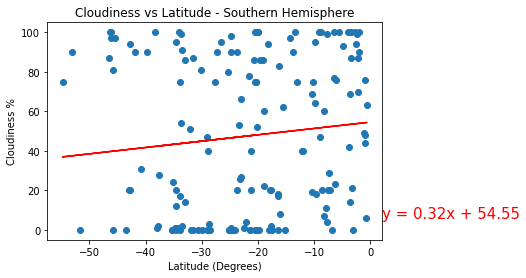

In [26]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Convert to floats and store lat(southern) and cloudiness (%) as x and y values
x_values = southern_hemi["lat"].astype('float')
y_values = southern_hemi["cloudiness %"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,6), fontsize=15,color="red")

# Label plot
plt.title("Cloudiness vs Latitude - Southern Hemisphere")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude (Degrees)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

#Observation
#This chart measures cloudiness in relation to distance from the equator in the southern hemisphere. Although there is a slight correlation, the chart makes it appear that there is little to no relevance between cloudiness and distance from the equator. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.04701077508777032


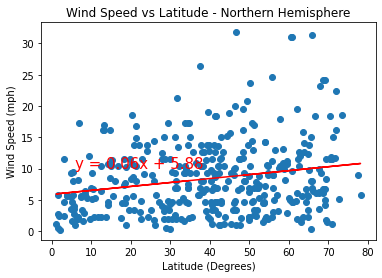

In [27]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

# Convert to floats and store lat(northern) and wind speed (mph) as x and y values
x_values = northern_hemi["lat"].astype('float')
y_values = northern_hemi["wind speed (mph)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15,color="red")

# Label plot
plt.title("Wind Speed vs Latitude - Northern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Degrees)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

#Observation
#This chart is analyzing wind speed in relation to distance from the equator in the northern hemisphere. From the chart, and the linear equation, it appears that the correlation between the two factors is fairly minimal. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.17711308692385327


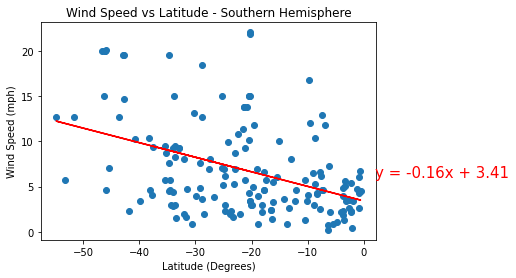

In [28]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

# Convert to floats and store lat(southern) and wind speed (mph) as x and y values
x_values = southern_hemi["lat"].astype('float')
y_values = southern_hemi["wind speed (mph)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,6), fontsize=15,color="red")

# Label plot
plt.title("Wind Speed vs Latitude - Southern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Degrees)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

#Observation
#This chart is analyzing wind speed in relation to distance from the equator in the southern hemisphere. From the chart, and the linear equation, it appears there is a marginal negative correlation between the two factors in that windspeed appears to get higher further south from the equator. 